## Alpha Vantage News API
- Offers a free tier with basic news endpoints

- Specifically focused on financial news

- Provides news sentiment analysis

- Easy to filter by company symbols/tickers

In [1]:
import requests
import pandas as pd
import json
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [2]:
API_KEY = "SU778HG0EYAA5PPN"
BASE_URL = "https://www.alphavantage.co/query"

In [3]:
def fetch_news(ticker):
    """
    Fetch news for a given ticker symbol
    """
    params = {
        "function": "NEWS_SENTIMENT",
        "tickers": ticker,
        "apikey": API_KEY,
        "sort": "RELEVANCE"
    }
    
    try:
        response = requests.get(BASE_URL, params=params)
        response.raise_for_status()  # Raise exception for bad status codes
        return response.json()
    except requests.exceptions.RequestException as e:
        print(f"Error fetching news: {e}")
        return None

In [4]:
# Fetch news for Apple
news_data = fetch_news("AAPL")

# Print the feed items in a readable format
if news_data and 'feed' in news_data:
    print(f"Number of news items: {len(news_data['feed'])}")
    # Print first article as an example
    print("\nFirst article details:")
    pprint(news_data['feed'][0])
else:
    print("No news data received")

Number of news items: 50

First article details:
{'authors': ['Henry Khederian'],
 'banner_image': 'https://cdn.benzinga.com/files/images/story/2022/05/21/man-2425121.jpg?width=1200&height=800&fit=crop',
 'category_within_source': 'Trading',
 'overall_sentiment_label': 'Neutral',
 'overall_sentiment_score': 0.114801,
 'source': 'Benzinga',
 'source_domain': 'www.benzinga.com',
 'summary': 'Enphase Energy Inc ( NASDAQ: ENPH ) is known as a global leader '
            'in solar energy solutions, and over the past five years, '
            'delivered beaming returns for traders and investors. Since May '
            "2017, Enphase Energy stock's 5-year return has outperformed "
            "several of the world's most popular cryptocurrencies,",
 'ticker_sentiment': [{'relevance_score': '0.977196',
                       'ticker': 'MSFT',
                       'ticker_sentiment_label': 'Neutral',
                       'ticker_sentiment_score': '0.044254'},
                      {'releva

In [5]:
def news_to_dataframe(news_data):
    """
    Convert news feed to a pandas DataFrame
    """
    if not news_data or 'feed' not in news_data:
        return pd.DataFrame()
    
    # Extract relevant fields
    news_list = []
    for item in news_data['feed']:
        news_list.append({
            'time_published': item['time_published'],
            'title': item['title'],
            'summary': item['summary'],
            'source': item['source'],
            'overall_sentiment_score': item.get('overall_sentiment_score', 0),
            'overall_sentiment_label': item.get('overall_sentiment_label', 'neutral')
        })
    
    df = pd.DataFrame(news_list)
    # Convert time to datetime
    df['time_published'] = pd.to_datetime(df['time_published'])
    return df

In [6]:
# Convert to DataFrame
news_df = news_to_dataframe(news_data)

# Display basic information about the DataFrame
print("DataFrame Info:")
print(news_df.info())

# Display first few rows
print("\nFirst few news items:")
print(news_df.head())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   time_published           50 non-null     datetime64[ns]
 1   title                    50 non-null     object        
 2   summary                  50 non-null     object        
 3   source                   50 non-null     object        
 4   overall_sentiment_score  50 non-null     float64       
 5   overall_sentiment_label  50 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 2.5+ KB
None

First few news items:
       time_published                                              title  \
0 2022-05-21 17:51:05  This Solar Company's 5-Year Return Makes Bitco...   
1 2022-03-14 12:23:05  US Warns China Against Helping Russia In Ukrai...   
2 2022-06-28 13:23:00  This Oil Company Has A Better 1-Year Return 

In [7]:
# Fetch news for NVIDIA
nvidia_news = fetch_news("NVDA")

# Print the first article details
if nvidia_news and 'feed' in nvidia_news:
    print(f"Number of news items: {len(nvidia_news['feed'])}")
    print("\nFirst article details:")
    pprint(nvidia_news['feed'][0])
else:
    print("No news data received")

Number of news items: 50

First article details:
{'authors': ['TD Ameritrade Network'],
 'banner_image': 'https://cdn.benzinga.com/files/images/story/2022/05/23/screenshot_2022-05-23_at_6.41.35_pm.png?width=1200&height=800&fit=crop',
 'category_within_source': 'News',
 'overall_sentiment_label': 'Neutral',
 'overall_sentiment_score': -0.022841,
 'source': 'Benzinga',
 'source_domain': 'www.benzinga.com',
 'summary': 'This post contains sponsored advertising content. This content is '
            'for informational purposes only and not intended to be investing '
            "advice. Let's take a market minute to have a look at a few things "
            'you should be keeping an eye as we begin the trading week. First, '
            'headlines from the president are attr',
 'ticker_sentiment': [{'relevance_score': '1.0',
                       'ticker': 'BABA',
                       'ticker_sentiment_label': 'Neutral',
                       'ticker_sentiment_score': '0.07642'},
     

In [8]:
# Convert NVIDIA news to DataFrame
nvidia_df = news_to_dataframe(nvidia_news)

# Display basic information
print("\nNVIDIA News DataFrame Info:")
print(nvidia_df.info())

# Show the most recent news items
print("\nMost recent NVIDIA news:")
print(nvidia_df.sort_values('time_published', ascending=False).head())


NVIDIA News DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   time_published           50 non-null     datetime64[ns]
 1   title                    50 non-null     object        
 2   summary                  50 non-null     object        
 3   source                   50 non-null     object        
 4   overall_sentiment_score  50 non-null     float64       
 5   overall_sentiment_label  50 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 2.5+ KB
None

Most recent NVIDIA news:
        time_published                                              title  \
1  2024-11-21 22:00:00  NVIDIA Announces Upcoming Events for Financial...   
18 2024-10-04 19:27:13  Why Advanced Micro Devices Stock Gained 10% in...   
3  2024-10-04 14:11:55  Massive News for Nvidia 

In [9]:
def analyze_sentiment_distribution(df):
    """
    Analyze the distribution of sentiment in news articles
    """
    sentiment_stats = {
        'average_sentiment': df['overall_sentiment_score'].mean(),
        'sentiment_counts': df['overall_sentiment_label'].value_counts(),
        'max_sentiment': df.loc[df['overall_sentiment_score'].idxmax()],
        'min_sentiment': df.loc[df['overall_sentiment_score'].idxmin()]
    }
    
    return sentiment_stats

# Analyze NVIDIA sentiment
nvidia_sentiment = analyze_sentiment_distribution(nvidia_df)
print("\nNVIDIA News Sentiment Analysis:")
print(f"Average Sentiment Score: {nvidia_sentiment['average_sentiment']:.3f}")
print("\nSentiment Distribution:")
print(nvidia_sentiment['sentiment_counts'])
print("\nMost Positive Article:")
print(f"Title: {nvidia_sentiment['max_sentiment']['title']}")
print(f"Score: {nvidia_sentiment['max_sentiment']['overall_sentiment_score']:.3f}")


NVIDIA News Sentiment Analysis:
Average Sentiment Score: 0.167

Sentiment Distribution:
overall_sentiment_label
Somewhat-Bullish    28
Neutral             20
Bullish              2
Name: count, dtype: int64

Most Positive Article:
Title: Susquehanna International Group adds $1B in Bitcoin ETFs to portfolio
Score: 0.464


In [10]:
def compare_tickers_news(tickers):
    """
    Compare news sentiment across multiple tickers
    """
    results = {}
    for ticker in tickers:
        news = fetch_news(ticker)
        if news and 'feed' in news:
            df = news_to_dataframe(news)
            results[ticker] = {
                'article_count': len(df),
                'avg_sentiment': df['overall_sentiment_score'].mean(),
                'recent_sentiment': df.sort_values('time_published', ascending=False)['overall_sentiment_score'].iloc[0]
            }
    
    return pd.DataFrame(results).T

# Compare NVIDIA with some related companies
comparison = compare_tickers_news(['NVDA', 'AMD', 'INTC'])
print("\nComparison of Tech Companies News Sentiment:")
print(comparison)


Comparison of Tech Companies News Sentiment:
      article_count  avg_sentiment  recent_sentiment
NVDA           50.0       0.167210          0.210541
AMD            50.0       0.197219          0.339253
INTC           50.0       0.069411          0.110523


In [11]:
def analyze_sentiment_trend(df):
    """
    Analyze how sentiment changes over time
    """
    df['date'] = df['time_published'].dt.date
    daily_sentiment = df.groupby('date')['overall_sentiment_score'].agg(['mean', 'count'])
    return daily_sentiment.sort_index(ascending=False)

# Show NVIDIA sentiment trend
nvidia_trend = analyze_sentiment_trend(nvidia_df)
print("\nNVIDIA Daily Sentiment Trend:")
print(nvidia_trend.head())


NVIDIA Daily Sentiment Trend:
                mean  count
date                       
2024-11-21  0.210541      1
2024-10-04  0.239038      2
2024-09-25  0.280138      1
2024-09-05  0.000000      1
2024-08-29  0.231643      2


In [12]:
def create_visualizations(df, ticker):
    # Setup the plotting style
    plt.style.use('classic')
    
    # Create figure with multiple subplots
    fig = plt.figure(figsize=(15, 12))
    
    # Convert time_published to datetime if it's not already
    df['date'] = pd.to_datetime(df['time_published']).dt.date
    
    # 1. Sentiment over time
    plt.subplot(2, 2, 1)
    daily_sentiment = df.groupby('date')['overall_sentiment_score'].mean()
    daily_sentiment.plot(kind='line', marker='o')
    plt.title(f'{ticker} Sentiment Trend')
    plt.xlabel('Date')
    plt.ylabel('Average Sentiment Score')
    plt.xticks(rotation=45)
    
    # 2. Sentiment distribution
    plt.subplot(2, 2, 2)
    sns.histplot(data=df, x='overall_sentiment_score', bins=20)
    plt.title('Sentiment Score Distribution')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Count')
    
    # 3. Sentiment by source
    plt.subplot(2, 2, 3)
    source_sentiment = df.groupby('source')['overall_sentiment_score'].agg(['mean', 'count'])
    source_sentiment = source_sentiment.sort_values('count', ascending=False).head(10)
    source_sentiment['mean'].plot(kind='bar')
    plt.title('Average Sentiment by Top News Sources')
    plt.xlabel('Source')
    plt.ylabel('Average Sentiment')
    plt.xticks(rotation=45)
    
    # 4. Article volume over time
    plt.subplot(2, 2, 4)
    daily_volume = df.groupby('date').size()
    daily_volume.plot(kind='bar')
    plt.title('Daily Article Volume')
    plt.xlabel('Date')
    plt.ylabel('Number of Articles')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    return fig

# Let's first check the data structure
def check_data_structure(ticker):
    """
    Debug function to check the structure of the news data
    """
    news = fetch_news(ticker)
    if news and 'feed' in news:
        df = news_to_dataframe(news)
        print("\nDataFrame Columns:")
        print(df.columns)
        print("\nFirst few rows of time_published:")
        print(df['time_published'].head())
        return df
    return None

# Usage example with error handling
def visualize_ticker_sentiment(ticker):
    """
    Create visualizations with error handling
    """
    try:
        # Fetch news
        news = fetch_news(ticker)
        if news and 'feed' in news:
            df = news_to_dataframe(news)
            
            # Print data info before visualization
            print("\nDataFrame Info:")
            print(df.info())
            
            fig = create_visualizations(df, ticker)
            plt.show()
            
            # Print summary statistics
            print(f"\nSummary Statistics for {ticker}:")
            print(f"Total Articles: {len(df)}")
            print(f"Average Sentiment: {df['overall_sentiment_score'].mean():.3f}")
            print(f"Most Common Sentiment Label: {df['overall_sentiment_label'].mode()[0]}")
            
            return df
    except Exception as e:
        print(f"Error during visualization: {str(e)}")
        print("Please check the data structure:")
        df = check_data_structure(ticker)
    return None


DataFrame Columns:
Index(['time_published', 'title', 'summary', 'source',
       'overall_sentiment_score', 'overall_sentiment_label'],
      dtype='object')

First few rows of time_published:
0   2022-05-23 13:13:25
1   2024-11-21 22:00:00
2   2024-08-29 21:00:00
3   2024-10-04 14:11:55
4   2022-06-02 17:12:40
Name: time_published, dtype: datetime64[ns]

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   time_published           50 non-null     datetime64[ns]
 1   title                    50 non-null     object        
 2   summary                  50 non-null     object        
 3   source                   50 non-null     object        
 4   overall_sentiment_score  50 non-null     float64       
 5   overall_sentiment_label  50 non-null     object        
dtypes: datetime64[ns](1), float64(

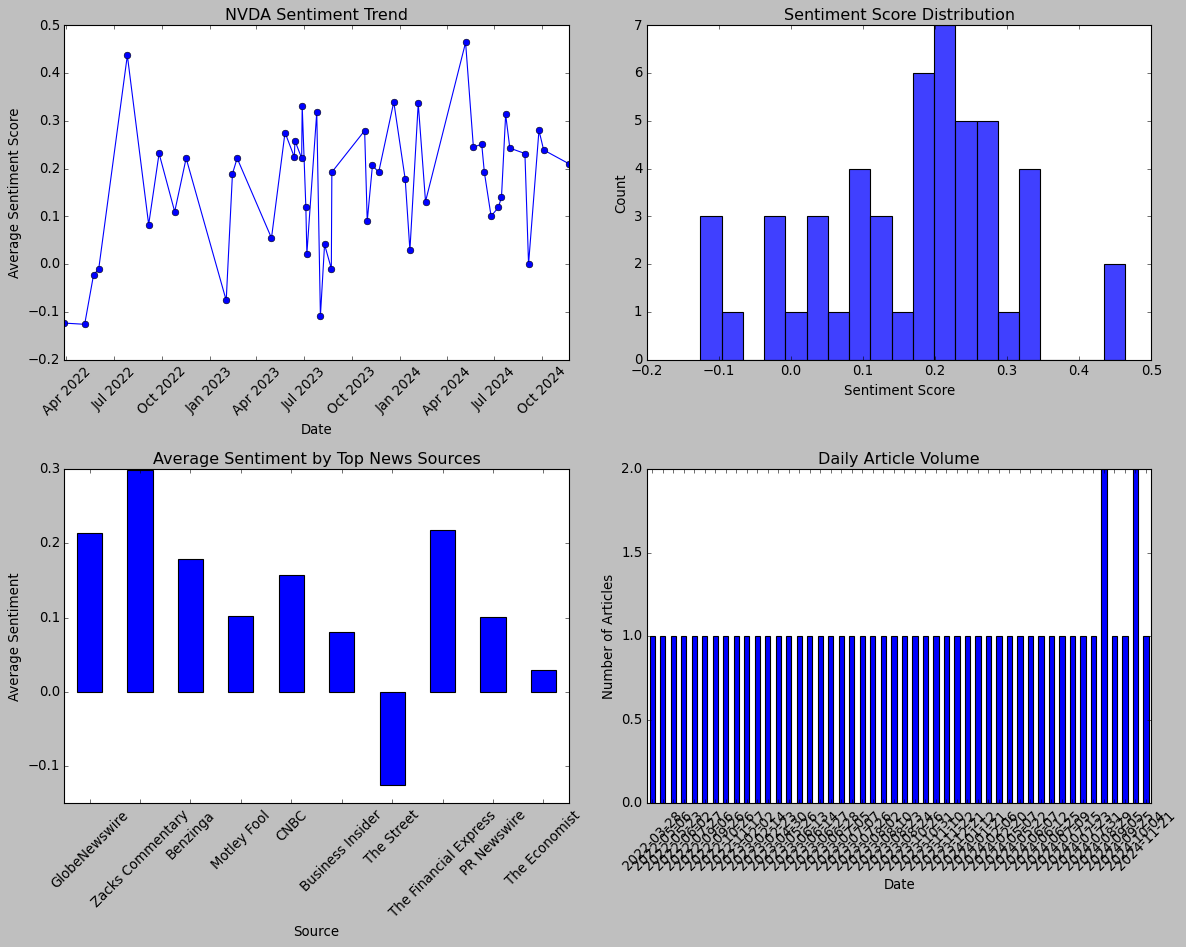


Summary Statistics for NVDA:
Total Articles: 50
Average Sentiment: 0.167
Most Common Sentiment Label: Somewhat-Bullish


In [13]:
df = check_data_structure('NVDA')

# If the data looks good, proceed with visualization
if df is not None:
    visualize_ticker_sentiment('NVDA')

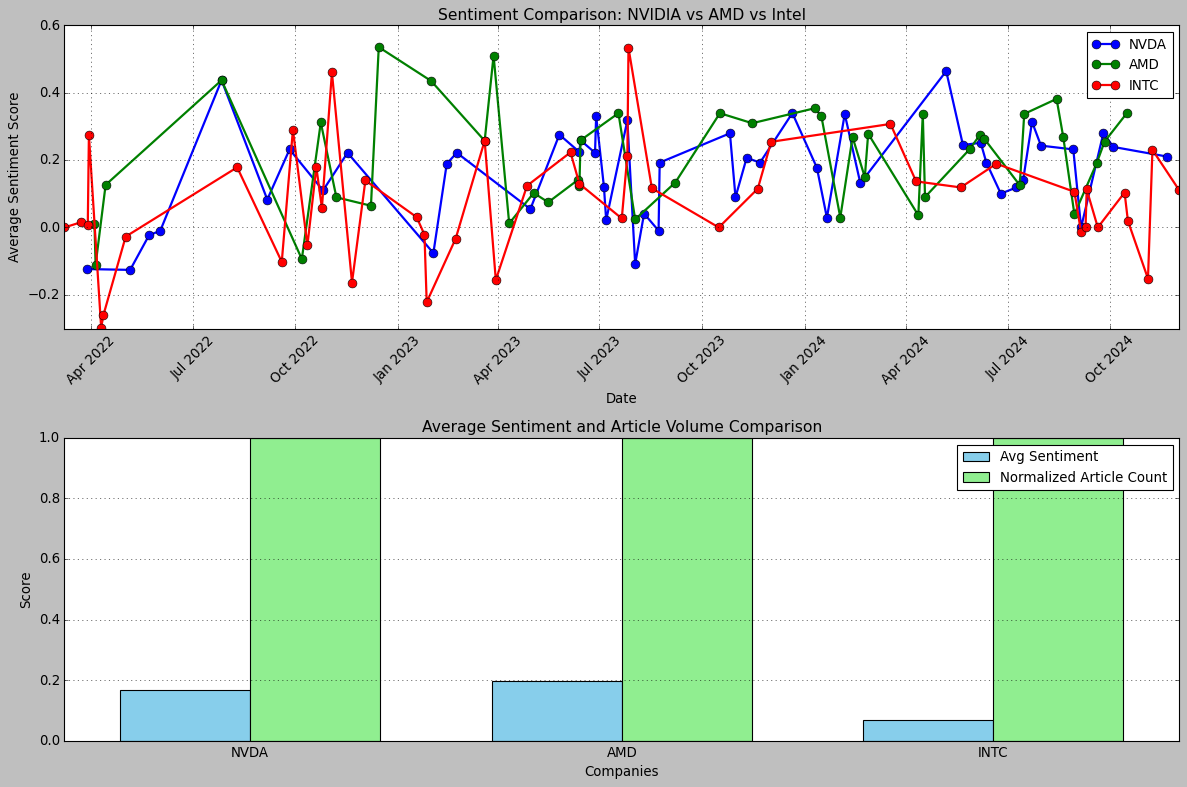


Summary Statistics:
--------------------------------------------------

NVDA:
Total Articles: 50
Average Sentiment: 0.167
Most Common Sentiment Label: Somewhat-Bullish
Latest Sentiment Score: 0.211

AMD:
Total Articles: 50
Average Sentiment: 0.197
Most Common Sentiment Label: Neutral
Latest Sentiment Score: 0.339

INTC:
Total Articles: 50
Average Sentiment: 0.069
Most Common Sentiment Label: Neutral
Latest Sentiment Score: 0.111


In [14]:
def compare_tech_companies():
    # Tickers to compare
    tickers = ['NVDA', 'AMD', 'INTC']
    
    # Create DataFrames dictionary to store data for each company
    company_data = {}
    
    # Fetch data for each company
    for ticker in tickers:
        news = fetch_news(ticker)
        if news and 'feed' in news:
            df = news_to_dataframe(news)
            df['date'] = pd.to_datetime(df['time_published']).dt.date
            company_data[ticker] = df
    
    # Create visualization
    plt.figure(figsize=(15, 10))
    
    # Plot sentiment trends
    plt.subplot(2, 1, 1)
    for ticker, df in company_data.items():
        daily_sentiment = df.groupby('date')['overall_sentiment_score'].mean()
        plt.plot(daily_sentiment.index, daily_sentiment.values, 
                marker='o', label=ticker, linewidth=2, markersize=8)
    
    plt.title('Sentiment Comparison: NVIDIA vs AMD vs Intel', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Average Sentiment Score', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.xticks(rotation=45)
    
    # Plot average sentiment and article count comparison
    plt.subplot(2, 1, 2)
    comparison_data = {
        'Ticker': [],
        'Avg Sentiment': [],
        'Article Count': []
    }
    
    for ticker, df in company_data.items():
        comparison_data['Ticker'].append(ticker)
        comparison_data['Avg Sentiment'].append(df['overall_sentiment_score'].mean())
        comparison_data['Article Count'].append(len(df))
    
    comparison_df = pd.DataFrame(comparison_data)
    
    # Create bar plot
    x = range(len(tickers))
    width = 0.35
    
    plt.bar([i - width/2 for i in x], comparison_df['Avg Sentiment'], 
            width, label='Avg Sentiment', color='skyblue')
    plt.bar([i + width/2 for i in x], comparison_df['Article Count']/max(comparison_df['Article Count']), 
            width, label='Normalized Article Count', color='lightgreen')
    
    plt.title('Average Sentiment and Article Volume Comparison', fontsize=14)
    plt.xlabel('Companies', fontsize=12)
    plt.ylabel('Score', fontsize=12)
    plt.xticks(x, tickers)
    plt.legend(fontsize=12)
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\nSummary Statistics:")
    print("-" * 50)
    for ticker, df in company_data.items():
        print(f"\n{ticker}:")
        print(f"Total Articles: {len(df)}")
        print(f"Average Sentiment: {df['overall_sentiment_score'].mean():.3f}")
        print(f"Most Common Sentiment Label: {df['overall_sentiment_label'].mode()[0]}")
        print(f"Latest Sentiment Score: {df.sort_values('time_published', ascending=False)['overall_sentiment_score'].iloc[0]:.3f}")

# Run the comparison
compare_tech_companies()

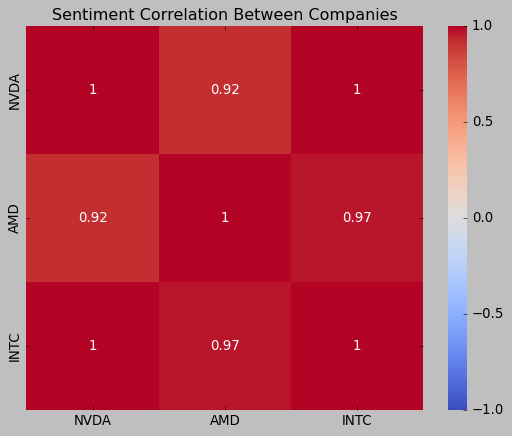


Sentiment Correlations:
          NVDA       AMD      INTC
NVDA  1.000000  0.917363  0.996820
AMD   0.917363  1.000000  0.968666
INTC  0.996820  0.968666  1.000000


In [15]:
def analyze_sentiment_correlations():
    tickers = ['NVDA', 'AMD', 'INTC']
    sentiment_data = {}
    
    # Fetch and process data
    for ticker in tickers:
        news = fetch_news(ticker)
        if news and 'feed' in news:
            df = news_to_dataframe(news)
            df['date'] = pd.to_datetime(df['time_published']).dt.date
            daily_sentiment = df.groupby('date')['overall_sentiment_score'].mean()
            sentiment_data[ticker] = daily_sentiment
    
    # Create DataFrame with all sentiments
    sentiment_df = pd.DataFrame(sentiment_data)
    
    # Calculate correlations
    correlations = sentiment_df.corr()
    
    # Plot correlation heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title('Sentiment Correlation Between Companies')
    plt.show()
    
    return correlations

# Run correlation analysis
correlations = analyze_sentiment_correlations()
print("\nSentiment Correlations:")
print(correlations)

In [16]:
def debug_data(tickers):
    print("Debugging Data Retrieval:")
    for ticker in tickers:
        print(f"\n{'-'*20} {ticker} {'-'*20}")
        # Check API response
        news = fetch_news(ticker)
        print(f"Got API response: {bool(news)}")
        print(f"Has 'feed' key: {bool(news and 'feed' in news)}")
        
        if news and 'feed' in news:
            # Check data conversion
            df = news_to_dataframe(news)
            print(f"DataFrame size: {len(df)}")
            print("\nFirst few sentiment scores:")
            print(df['overall_sentiment_score'].head())
            print("\nSentiment score range:")
            print(f"Min: {df['overall_sentiment_score'].min()}")
            print(f"Max: {df['overall_sentiment_score'].max()}")
            print(f"Mean: {df['overall_sentiment_score'].mean()}")
        else:
            print("No data to process")

# Run debug check
tickers = ['NVDA', 'AMD', 'INTC']
debug_data(tickers)

Debugging Data Retrieval:

-------------------- NVDA --------------------
Got API response: True
Has 'feed' key: True
DataFrame size: 50

First few sentiment scores:
0   -0.022841
1    0.210541
2    0.212783
3    0.194797
4   -0.009979
Name: overall_sentiment_score, dtype: float64

Sentiment score range:
Min: -0.125994
Max: 0.464114
Mean: 0.1672101

-------------------- AMD --------------------
Got API response: True
Has 'feed' key: True
DataFrame size: 50

First few sentiment scores:
0    0.311611
1    0.309466
2    0.281619
3    0.011969
4   -0.153989
Name: overall_sentiment_score, dtype: float64

Sentiment score range:
Min: -0.153989
Max: 0.535396
Mean: 0.19721948

-------------------- INTC --------------------
Got API response: True
Has 'feed' key: True
DataFrame size: 50

First few sentiment scores:
0    0.115113
1    0.274076
2   -0.260362
3    0.000000
4    0.254284
Name: overall_sentiment_score, dtype: float64

Sentiment score range:
Min: -0.297863
Max: 0.53338
Mean: 0.06941074

In [17]:
def inspect_api_response(tickers):
    print("Inspecting Raw API Responses:")
    for ticker in tickers:
        print(f"\n{'-'*20} {ticker} {'-'*20}")
        news = fetch_news(ticker)
        print("Raw API Response:")
        print(news)  # This will show us the actual response content

tickers = ['NVDA', 'AMD', 'INTC']
inspect_api_response(tickers)

Inspecting Raw API Responses:

-------------------- NVDA --------------------
Raw API Response:
{'items': '50', 'sentiment_score_definition': 'x <= -0.35: Bearish; -0.35 < x <= -0.15: Somewhat-Bearish; -0.15 < x < 0.15: Neutral; 0.15 <= x < 0.35: Somewhat_Bullish; x >= 0.35: Bullish', 'relevance_score_definition': '0 < x <= 1, with a higher score indicating higher relevance.', 'feed': [{'title': "Monday's Market Minute: A Busy Week On Wall Street", 'url': 'https://www.benzinga.com/news/earnings/22/05/27346302/mondays-market-minute-a-busy-week-on-wall-street', 'time_published': '20220523T131325', 'authors': ['TD Ameritrade Network'], 'summary': "This post contains sponsored advertising content. This content is for informational purposes only and not intended to be investing advice. Let's take a market minute to have a look at a few things you should be keeping an eye as we begin the trading week. First, headlines from the president are attr", 'banner_image': 'https://cdn.benzinga.com/fi

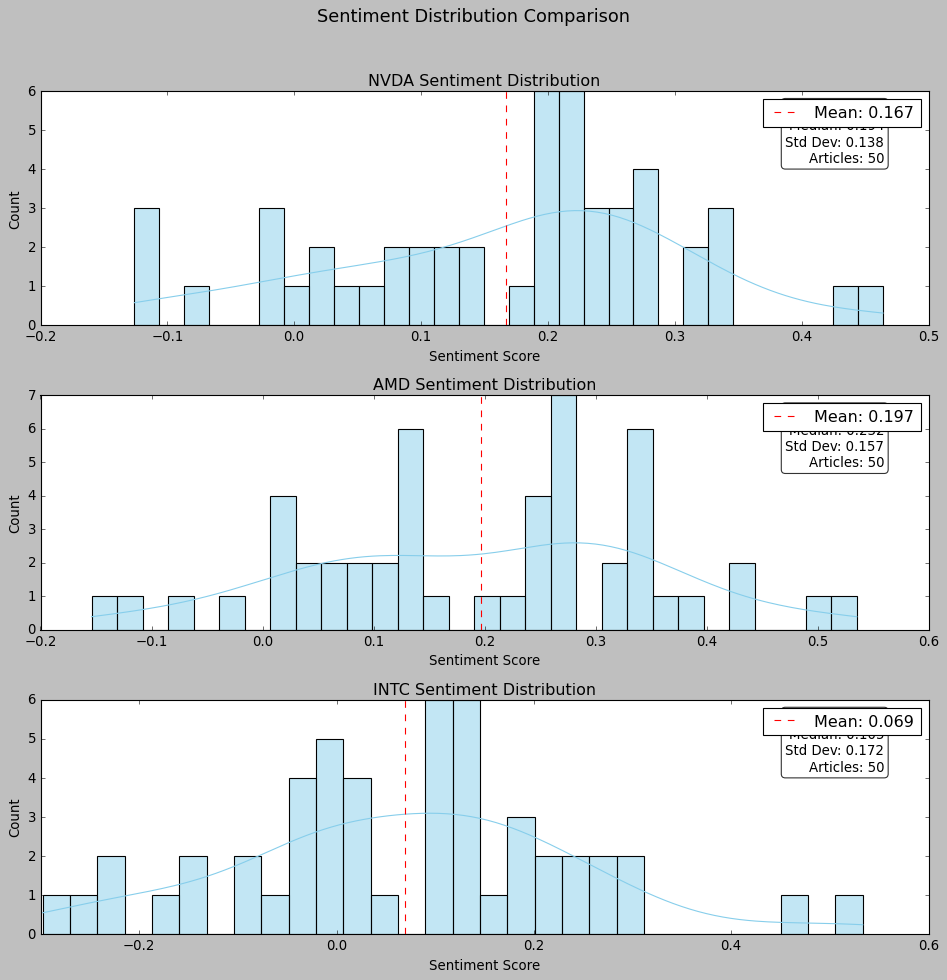


Detailed Sentiment Statistics:
--------------------------------------------------

NVDA:
count    50.000000
mean      0.167210
std       0.137700
min      -0.125994
25%       0.084654
50%       0.193765
75%       0.250969
max       0.464114
Name: overall_sentiment_score, dtype: float64

Sentiment Label Distribution:
overall_sentiment_label
Somewhat-Bullish    28
Neutral             20
Bullish              2
Name: count, dtype: int64

AMD:
count    50.000000
mean      0.197219
std       0.157291
min      -0.153989
25%       0.089625
50%       0.232012
75%       0.311075
max       0.535396
Name: overall_sentiment_score, dtype: float64

Sentiment Label Distribution:
overall_sentiment_label
Neutral             22
Somewhat-Bullish    21
Bullish              6
Somewhat-Bearish     1
Name: count, dtype: int64

INTC:
count    50.000000
mean      0.069411
std       0.171823
min      -0.297863
25%      -0.025673
50%       0.104783
75%       0.171827
max       0.533380
Name: overall_sentiment_sc

In [18]:
def visualize_sentiment_distribution(tickers):
   # Create a figure with subplots for each distribution
   fig, axes = plt.subplots(len(tickers), 1, figsize=(12, 4*len(tickers)))
   fig.suptitle('Sentiment Distribution Comparison', fontsize=16, y=1.02)
   
   # Fetch and plot data for each company
   for idx, ticker in enumerate(tickers):
       news = fetch_news(ticker)
       if news and 'feed' in news:
           df = news_to_dataframe(news)
           
           # Create KDE plot with histogram
           sns.histplot(data=df, x='overall_sentiment_score', ax=axes[idx], 
                       bins=30, kde=True, color='skyblue')
           
           # Add vertical line for mean
           mean_sentiment = df['overall_sentiment_score'].mean()
           axes[idx].axvline(x=mean_sentiment, color='red', linestyle='--', 
                           label=f'Mean: {mean_sentiment:.3f}')
           
           # Customize subplot
           axes[idx].set_title(f'{ticker} Sentiment Distribution')
           axes[idx].set_xlabel('Sentiment Score')
           axes[idx].set_ylabel('Count')
           axes[idx].legend()
           
           # Add summary statistics as text
           stats_text = (f'Mean: {mean_sentiment:.3f}\n'
                        f'Median: {df["overall_sentiment_score"].median():.3f}\n'
                        f'Std Dev: {df["overall_sentiment_score"].std():.3f}\n'
                        f'Articles: {len(df)}')
           
           axes[idx].text(0.95, 0.95, stats_text,
                        transform=axes[idx].transAxes,
                        verticalalignment='top',
                        horizontalalignment='right',
                        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
           
   plt.tight_layout()
   plt.show()
   
   # Print detailed statistics
   print("\nDetailed Sentiment Statistics:")
   print("-" * 50)
   for ticker in tickers:
       news = fetch_news(ticker)
       if news and 'feed' in news:
           df = news_to_dataframe(news)
           print(f"\n{ticker}:")
           print(df['overall_sentiment_score'].describe())
           print("\nSentiment Label Distribution:")
           print(df['overall_sentiment_label'].value_counts())

# Run the visualization for the three companies
tickers = ['NVDA', 'AMD', 'INTC']
visualize_sentiment_distribution(tickers)

# RSS

In [21]:
import feedparser
import pandas as pd
from datetime import datetime
import time
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import numpy as np
from dateutil import parser

# Download required NLTK data
try:
    nltk.data.find('vader_lexicon')
except LookupError:
    nltk.download('vader_lexicon')
    nltk.download('punkt')
    nltk.download('stopwords')

def parse_date(date_str):
    """
    Safely parse dates from RSS feeds
    """
    try:
        return parser.parse(date_str).replace(tzinfo=None)
    except:
        return None

def fetch_financial_rss():
    rss_feeds = {
        'Yahoo Finance': 'https://finance.yahoo.com/news/rssindex',
        'MarketWatch': 'http://feeds.marketwatch.com/marketwatch/topstories/',
        'Reuters Business': 'https://www.reutersagency.com/feed/?best-topics=business-finance&post_type=best',
        'CNBC': 'https://www.cnbc.com/id/10000664/device/rss/rss.html',
    }
    
    all_entries = []
    sia = SentimentIntensityAnalyzer()
    
    for source, url in rss_feeds.items():
        try:
            print(f"Fetching from {source}...")
            feed = feedparser.parse(url)
            
            for entry in feed.entries:
                # Get the text content
                title = entry.title
                summary = entry.get('summary', '')
                combined_text = f"{title}. {summary}"
                
                # Perform sentiment analysis
                sentiment_scores = sia.polarity_scores(combined_text)
                
                # Parse the date properly
                published_date = parse_date(entry.get('published', ''))
                
                news_item = {
                    'source': source,
                    'title': title,
                    'published': published_date,
                    'summary': summary,
                    'link': entry.get('link', ''),
                    'compound_score': sentiment_scores['compound'],
                    'positive_score': sentiment_scores['pos'],
                    'negative_score': sentiment_scores['neg'],
                    'neutral_score': sentiment_scores['neu']
                }
                all_entries.append(news_item)
                
            print(f"Got {len(feed.entries)} entries from {source}")
            time.sleep(1)  # Be nice to the servers
            
        except Exception as e:
            print(f"Error fetching from {source}: {str(e)}")
    
    df = pd.DataFrame(all_entries)
    return df

def get_company_news_with_nltk(company_name, lookback_days=7):
    """
    Get and analyze news for a specific company using NLTK
    """
    news_df = fetch_financial_rss()
    
    # Filter for company
    mask = news_df['title'].str.contains(company_name, case=False, na=False)
    mask |= news_df['summary'].str.contains(company_name, case=False, na=False)
    company_news = news_df[mask].copy()
    
    if len(company_news) > 0:
        # Filter for date
        cutoff_date = datetime.now() - pd.Timedelta(days=lookback_days)
        company_news = company_news[company_news['published'].notna()]  # Remove entries with no date
        company_news = company_news[company_news['published'] >= cutoff_date]
        
        # Calculate sentiment labels
        company_news['sentiment_label'] = company_news['compound_score'].apply(
            lambda x: 'Positive' if x > 0.2 else ('Negative' if x < -0.2 else 'Neutral')
        )
        
        # Sort by date
        company_news = company_news.sort_values('published', ascending=False)
    
    return company_news

def analyze_company_sentiment():
    company = input("Enter company name (e.g., NVIDIA): ")
    days = int(input("Enter number of days to look back: "))
    
    news = get_company_news_with_nltk(company, days)
    
    if len(news) > 0:
        print(f"\nFound {len(news)} articles about {company} in the last {days} days")
        
        # Sentiment statistics
        print("\nSentiment Analysis:")
        print(f"Average compound sentiment: {news['compound_score'].mean():.3f}")
        print(f"Average positive score: {news['positive_score'].mean():.3f}")
        print(f"Average negative score: {news['negative_score'].mean():.3f}")
        print(f"Average neutral score: {news['neutral_score'].mean():.3f}")
        
        # Distribution of sentiment labels
        sentiment_dist = news['sentiment_label'].value_counts()
        print("\nSentiment Distribution:")
        for label, count in sentiment_dist.items():
            print(f"{label}: {count} articles ({count/len(news)*100:.1f}%)")
        
        # Show most significant articles
        print("\nMost Positive Articles:")
        positive_news = news.nlargest(3, 'compound_score')
        for _, article in positive_news.iterrows():
            print(f"\nDate: {article['published']}")
            print(f"Source: {article['source']}")
            print(f"Title: {article['title']}")
            print(f"Sentiment Score: {article['compound_score']:.3f}")
        
        print("\nMost Negative Articles:")
        negative_news = news.nsmallest(3, 'compound_score')
        for _, article in negative_news.iterrows():
            print(f"\nDate: {article['published']}")
            print(f"Source: {article['source']}")
            print(f"Title: {article['title']}")
            print(f"Sentiment Score: {article['compound_score']:.3f}")
    else:
        print(f"No recent news found for {company}")

# Run the analysis
if __name__ == "__main__":
    analyze_company_sentiment()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\thinkpad\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\thinkpad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thinkpad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Fetching from Yahoo Finance...
Got 48 entries from Yahoo Finance
Fetching from MarketWatch...
Got 10 entries from MarketWatch
Fetching from Reuters Business...
Got 0 entries from Reuters Business
Fetching from CNBC...
Got 30 entries from CNBC

Found 1 articles about nvidia in the last 10 days

Sentiment Analysis:
Average compound sentiment: 0.402
Average positive score: 0.383
Average negative score: 0.191
Average neutral score: 0.426

Sentiment Distribution:
Positive: 1 articles (100.0%)

Most Positive Articles:

Date: 2024-12-31 19:32:42
Source: Yahoo Finance
Title: Magnificent Seven Stocks: Nvidia Sells Off; Tesla Extends Losses
Sentiment Score: 0.402

Most Negative Articles:

Date: 2024-12-31 19:32:42
Source: Yahoo Finance
Title: Magnificent Seven Stocks: Nvidia Sells Off; Tesla Extends Losses
Sentiment Score: 0.402
